In [1]:
%load_ext jupyternotify
%autonotify -a 60

<IPython.core.display.Javascript object>

In [2]:
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from scipy import stats

import sys
import seaborn as sns
import pandas as pd
import numpy as np
import csv

import warnings
warnings.filterwarnings('ignore')

In [3]:
class colour:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [4]:
def openFile(path):
    
    # Display upto 500 characters per column
    pd.set_option('display.max_colwidth', 500)
   
    
    # Open dataset
    df_original = pd.read_csv(path + 'dataset_Facebook.csv', delimiter = ';')
    
    # Training and target features
    base_features = df_original.columns[:7]  
    target_features = df_original.columns[7:]
    
    # Drop empty fields
    df = df_original.dropna()
    
    # Change the Type feature to category first before using one-hot-encoding
    # All dataFrames below this point can be used for ML regression algorithms
    # The DFs above this can be used for regression IFF the 'Type' feature is dropped
    df_1hoten = df
    df_1hoten['Type'] = df['Type'].astype('category').cat.codes
    
    # Drop outliers that lie outside 3 standard deviations from the mean
    df_no_outliers = df
    df_no_outliers = df_no_outliers[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]
    
    # DataFrame with scaled training features
    df_scaled = df
    df_scaled[base_features] = scaler.fit_transform(df_scaled[base_features].values)

    return df_original, df, df_1hoten, df_no_outliers, df_scaled, base_features, target_features

In [5]:
path = sys.argv[0]
# path = '/Users/adil/Documents/Additional Work/fospha/'

In [6]:
df_original, df, df_1hoten, df_no_outliers, df_scaled, base_features, target_features = openFile(path)

In [7]:
print('Data Frame: ', '(Total observations, Total features)\n')
print('Original df:             ', df_original.shape)
print('Cleaned df:              ', df.shape)
print('1 hot Encoded df:        ', df_1hoten.shape)
print('Scaled base_features df: ', df_scaled.shape)
print('No outliers df:          ', df_no_outliers. shape)

Data Frame:  (Total observations, Total features)

Original df:              (500, 19)
Cleaned df:               (495, 19)
1 hot Encoded df:         (495, 19)
Scaled base_features df:  (495, 19)
No outliers df:           (444, 19)


### 1 hot Ended df is the one that will be used for all the analysis for ALL of section 2

In [8]:
print('Data Type for each feature:\n ')
print(df_1hoten.dtypes)

Data Type for each feature:
 
Page total likes                                                       float64
Type                                                                   float64
Category                                                               float64
Post Month                                                             float64
Post Weekday                                                           float64
Post Hour                                                              float64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressi

### Plot distributions for the training features

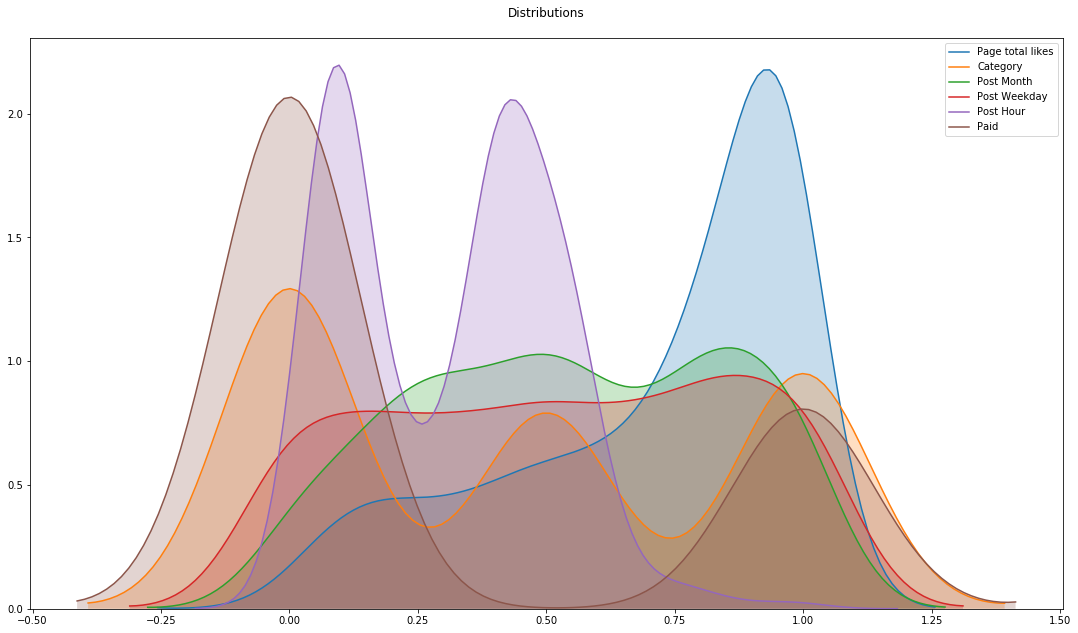

In [9]:
for i in range(len(base_features)):
    if base_features[i] != base_features[1]:
        sns.kdeplot(df_1hoten[base_features[i]], shade = True, label = base_features[i])

plt.title('Distributions\n')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Plot distributions of training features

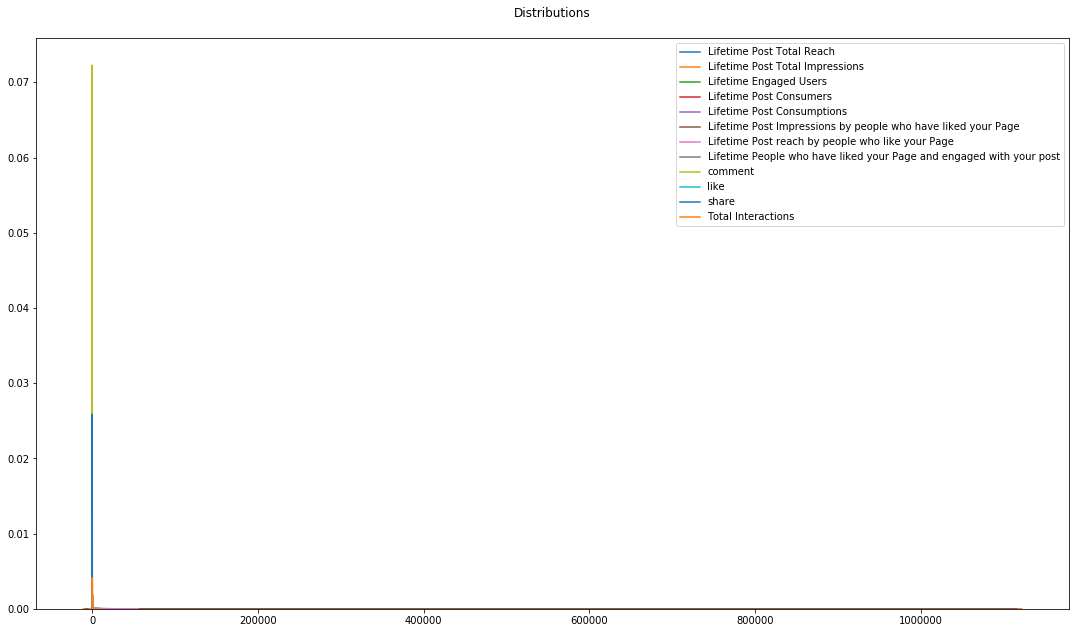

In [10]:
for i in range(len(target_features)):
#     if target_features[i] != target_features[8]:
    sns.kdeplot(df_1hoten[target_features[i]], shade = True, label = target_features[i])

plt.title('Distributions\n')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

###### Seems the distributions for target feature roughly look the same, however, there's a great discrepency in the number of values

###### Correlation

In [23]:
matrix_corr = df_1hoten.corr()
matrix_corr

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Page total likes,1.000000,0.214502,-0.084925,0.940892,-0.012685,-0.150466,0.009406,-0.082650,-0.102703,-0.110379,-0.148021,-0.127574,-0.096492,-0.059286,0.036287,0.032668,0.054906,-0.004801,0.047952
Type,0.214502,1.000000,0.055925,0.194172,0.020916,0.033926,0.016768,0.077681,0.048039,0.350386,0.390176,0.240724,0.044670,0.182267,0.486135,0.050949,0.042609,0.093485,0.049504
Category,-0.084925,0.055925,1.000000,-0.121637,-0.045016,-0.106965,-0.027818,-0.147589,-0.097811,-0.002569,-0.036968,-0.155123,-0.050116,-0.111395,0.015816,0.025116,0.124101,0.149209,0.123557
Post Month,0.940892,0.194172,-0.121637,1.000000,0.009694,-0.181316,-0.014887,-0.101060,-0.100952,-0.113358,-0.144896,-0.141257,-0.094327,-0.089883,0.014094,0.007262,0.027346,-0.021869,0.021204
Post Weekday,-0.012685,0.020916,-0.045016,0.009694,1.000000,0.045980,0.003250,-0.045699,-0.030826,-0.042740,-0.024228,-0.016853,-0.044550,-0.062904,0.007021,-0.074726,-0.079296,-0.048711,-0.077008
Post Hour,-0.150466,0.033926,-0.106965,-0.181316,0.045980,1.000000,-0.069143,0.003009,0.012525,0.003748,0.012175,0.078787,0.038759,0.052158,0.037801,0.000563,-0.024721,-0.058695,-0.027541
Paid,0.009406,0.016768,-0.027818,-0.014887,0.003250,-0.069143,1.000000,0.144170,0.060860,0.113796,0.094603,0.094808,0.001925,0.106648,0.050740,0.074137,0.108940,0.076821,0.105313
Lifetime Post Total Reach,-0.082650,0.077681,-0.147589,-0.101060,-0.045699,0.003009,0.144170,1.000000,0.694469,0.569135,0.476183,0.322345,0.321466,0.742141,0.398580,0.426126,0.544262,0.456413,0.537364
Lifetime Post Total Impressions,-0.102703,0.048039,-0.097811,-0.100952,-0.030826,0.012525,0.060860,0.694469,1.000000,0.367281,0.313849,0.224643,0.850700,0.651500,0.322420,0.315759,0.344250,0.286864,0.342260
Lifetime Engaged Users,-0.110379,0.350386,-0.002569,-0.113358,-0.042740,0.003748,0.113796,0.569135,0.367281,1.000000,0.968088,0.675695,0.259366,0.610261,0.838541,0.504954,0.568608,0.531346,0.570826


In [24]:
c = matrix_corr.abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort")

print(colour.BOLD + 'Features with the minimum correlation: ' + colour.END, so[0:1])
print(colour.BOLD + 'Features with the maximum correlation: ' + colour.END, so[-20:-19])

Features with the minimum correlation:  comment  Post Hour    0.000563
dtype: float64
Features with the maximum correlation:  like  Total Interactions    0.997702
dtype: float64


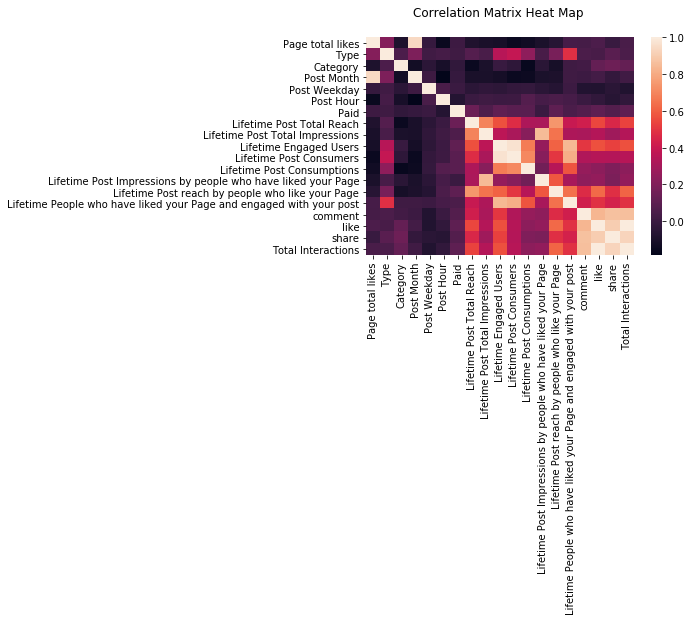

In [25]:
sns.heatmap(matrix_corr)
plt.title('Correlation Matrix Heat Map \n')
plt.show()

###### Summary metrics for target_features (to be used for next part of task)

In [26]:
df_1hoten[target_features].describe()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


###### The standard deviation sticks out for these features, in most cases it is extremely high